<a href="https://colab.research.google.com/github/aniketsharma00411/episodic_memory/blob/main/CNN_LSTM_CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialization

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Permute
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Flatten

from tensorflow.keras.callbacks import EarlyStopping

import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

# MNIST

In [ ]:
img_dim = 28

In [ ]:
def preprocess(image, label):
  return tf.cast(tf.reshape(image, (img_dim, img_dim, 1)), tf.float32)/255., label

In [ ]:
(mnist_train, mnist_test), mnist_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

mnist_train = mnist_train.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
mnist_train = mnist_train.cache()
mnist_train = mnist_train.shuffle(mnist_info.splits['train'].num_examples)
mnist_train = mnist_train.batch(32)
mnist_train = mnist_train.prefetch(tf.data.AUTOTUNE)

mnist_test = mnist_test.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
mnist_test = mnist_test.batch(32)
mnist_test = mnist_test.cache()
mnist_test = mnist_test.prefetch(tf.data.AUTOTUNE)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]


Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
mnist_info

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

In [ ]:
model1 = Sequential()

model1.add(Conv2D(64, (3, 3), padding='same', input_shape = (img_dim,img_dim,1), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Permute((3, 1, 2)))
model1.add(Reshape((64, 3*3)))

model1.add(LSTM(256))

model1.add(Reshape((16, 16, 1)))

model1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())

model1.add(Dropout(0.5))
model1.add(Dense(units=32, activation='relu'))

model1.add(Dense(units=10, activation='softmax'))

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0

In [ ]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

In [ ]:
history1 = model1.fit(
    mnist_train,
    epochs=10,
    callbacks=[early_stopping],
    validation_data=mnist_test
    )

Epoch 1/10
1875/1875 [==============================] - 80s 27ms/step - loss: 0.3553 - accuracy: 0.8796 - val_loss: 0.0876 - val_accuracy: 0.9723
Epoch 2/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0882 - accuracy: 0.9737 - val_loss: 0.0659 - val_accuracy: 0.9788
Epoch 3/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0636 - accuracy: 0.9809 - val_loss: 0.0585 - val_accuracy: 0.9829
Epoch 4/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0495 - accuracy: 0.9851 - val_loss: 0.0485 - val_accuracy: 0.9856
Epoch 5/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0422 - accuracy: 0.9868 - val_loss: 0.0483 - val_accuracy: 0.9851
Epoch 6/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0362 - accuracy: 0.9889 - val_loss: 0.0426 - val_accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0305 - accuracy: 0.9908 - val_loss: 0.0522 -

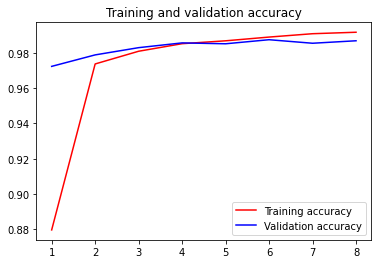

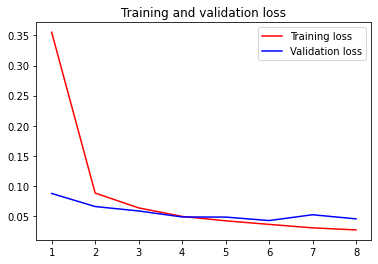

In [ ]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model1.evaluate(mnist_train)

1875/1875 [==============================] - 18s 9ms/step - loss: 0.0284 - accuracy: 0.9913


[0.028436144813895226, 0.9913333058357239]

In [ ]:
model1.evaluate(mnist_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0426 - accuracy: 0.9874


[0.04258633404970169, 0.9873999953269958]

In [ ]:
model1.save('CNN_LSTM_CNN_MNIST.h5')

# CIFAR-10

In [ ]:
img_dim = 32

In [ ]:
def preprocess(image, label):
  return tf.cast(tf.reshape(image, (img_dim, img_dim, 3)), tf.float32)/255., label

In [ ]:
(cifar10_train, cifar10_test), cifar10_info = tfds.load(
    'cifar10',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

cifar10_train = cifar10_train.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
cifar10_train = cifar10_train.cache()
cifar10_train = cifar10_train.shuffle(cifar10_info.splits['train'].num_examples)
cifar10_train = cifar10_train.batch(32)
cifar10_train = cifar10_train.prefetch(tf.data.AUTOTUNE)

cifar10_test = cifar10_test.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
cifar10_test = cifar10_test.batch(32)
cifar10_test = cifar10_test.cache()
cifar10_test = cifar10_test.prefetch(tf.data.AUTOTUNE)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteBEL5UV/cifar10-train.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteBEL5UV/cifar10-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [ ]:
cifar10_info

tfds.core.DatasetInfo(
    name='cifar10',
    version=3.0.2,
    description='The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.',
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    features=FeaturesDict({
        'id': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=60000,
    splits={
        'test': 10000,
        'train': 50000,
    },
    supervised_keys=('image', 'label'),
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning multiple layers of features from tiny images},
        institution = {},
        year = {2009}
    }""",
    redistribution_info=,
)

In [ ]:
model2 = Sequential()

model2.add(Conv2D(64, (3, 3), padding='same', input_shape = (img_dim,img_dim,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Permute((3, 1, 2)))
model2.add(Reshape((64, 4*4)))

model2.add(LSTM(256))

model2.add(Reshape((16, 16, 1)))

model2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())

model2.add(Dropout(0.5))
model2.add(Dense(units=32, activation='relu'))

model2.add(Dense(units=10, activation='softmax'))

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 4, 64)        

In [ ]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

In [ ]:
history2 = model2.fit(
    cifar10_train,
    epochs=30,
    callbacks=[early_stopping],
    validation_data=cifar10_test
    )

Epoch 1/30
1563/1563 [==============================] - 69s 31ms/step - loss: 1.8557 - accuracy: 0.3051 - val_loss: 1.5339 - val_accuracy: 0.4243
Epoch 2/30
1563/1563 [==============================] - 45s 29ms/step - loss: 1.4308 - accuracy: 0.4763 - val_loss: 1.3731 - val_accuracy: 0.5026
Epoch 3/30
1563/1563 [==============================] - 45s 29ms/step - loss: 1.2483 - accuracy: 0.5495 - val_loss: 1.1732 - val_accuracy: 0.5826
Epoch 4/30
1563/1563 [==============================] - 45s 29ms/step - loss: 1.1280 - accuracy: 0.5995 - val_loss: 1.0932 - val_accuracy: 0.6129
Epoch 5/30
1563/1563 [==============================] - 45s 29ms/step - loss: 1.0416 - accuracy: 0.6282 - val_loss: 1.0751 - val_accuracy: 0.6223
Epoch 6/30
1563/1563 [==============================] - 44s 28ms/step - loss: 0.9759 - accuracy: 0.6543 - val_loss: 1.0121 - val_accuracy: 0.6457
Epoch 7/30
1563/1563 [==============================] - 45s 28ms/step - loss: 0.9044 - accuracy: 0.6798 - val_loss: 0.9968 -

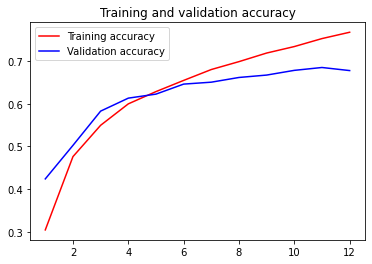

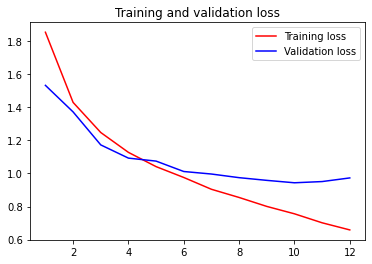

In [ ]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model2.evaluate(cifar10_train)

1563/1563 [==============================] - 20s 13ms/step - loss: 0.6594 - accuracy: 0.7705


[0.6593815088272095, 0.7705399990081787]

In [ ]:
model2.evaluate(cifar10_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9438 - accuracy: 0.6778


[0.943773627281189, 0.6777999997138977]

In [ ]:
model2.save('CNN_LSTM_CNN_CIFAR10.h5')

# Fashion MNIST

In [ ]:
img_dim = 28

In [ ]:
def preprocess(image, label):
  return tf.cast(tf.reshape(image, (img_dim, img_dim, 1)), tf.float32)/255., label

In [ ]:
(fashion_mnist_train, fashion_mnist_test), fashion_mnist_info = tfds.load(
    'fashion_mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

fashion_mnist_train = fashion_mnist_train.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
fashion_mnist_train = fashion_mnist_train.cache()
fashion_mnist_train = fashion_mnist_train.shuffle(fashion_mnist_info.splits['train'].num_examples)
fashion_mnist_train = fashion_mnist_train.batch(32)
fashion_mnist_train = fashion_mnist_train.prefetch(tf.data.AUTOTUNE)

fashion_mnist_test = fashion_mnist_test.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
fashion_mnist_test = fashion_mnist_test.batch(32)
fashion_mnist_test = fashion_mnist_test.cache()
fashion_mnist_test = fashion_mnist_test.prefetch(tf.data.AUTOTUNE)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteZW0GTY/fashion_mnist-train.tfrecord


  0%|          | 0/60000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteZW0GTY/fashion_mnist-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
fashion_mnist_info

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.1,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume

In [ ]:
model3 = Sequential()

model3.add(Conv2D(64, (3, 3), padding='same', input_shape = (img_dim,img_dim,1), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Permute((3, 1, 2)))
model3.add(Reshape((64, 3*3)))

model3.add(LSTM(256))

model3.add(Reshape((16, 16, 1)))

model3.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())

model3.add(Dropout(0.5))
model3.add(Dense(units=32, activation='relu'))

model3.add(Dense(units=10, activation='softmax'))

In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 3, 3, 64)        

In [ ]:
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

In [ ]:
history3 = model3.fit(
    fashion_mnist_train,
    epochs=25,
    callbacks=[early_stopping],
    validation_data=fashion_mnist_test
    )

Epoch 1/25
1875/1875 [==============================] - 58s 26ms/step - loss: 0.6786 - accuracy: 0.7465 - val_loss: 0.4802 - val_accuracy: 0.8134
Epoch 2/25
1875/1875 [==============================] - 47s 25ms/step - loss: 0.4147 - accuracy: 0.8465 - val_loss: 0.3922 - val_accuracy: 0.8521
Epoch 3/25
1875/1875 [==============================] - 47s 25ms/step - loss: 0.3473 - accuracy: 0.8698 - val_loss: 0.3478 - val_accuracy: 0.8699
Epoch 4/25
1875/1875 [==============================] - 47s 25ms/step - loss: 0.3073 - accuracy: 0.8866 - val_loss: 0.3121 - val_accuracy: 0.8822
Epoch 5/25
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2774 - accuracy: 0.8972 - val_loss: 0.3072 - val_accuracy: 0.8864
Epoch 6/25
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2548 - accuracy: 0.9049 - val_loss: 0.2923 - val_accuracy: 0.8936
Epoch 7/25
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2347 - accuracy: 0.9135 - val_loss: 0.2694 -

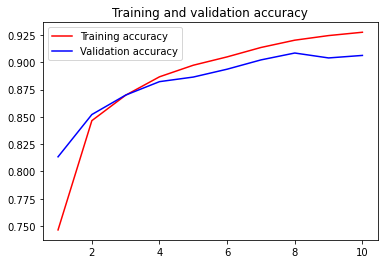

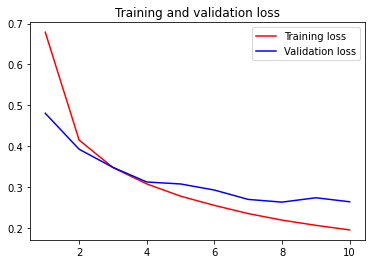

In [ ]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model3.evaluate(fashion_mnist_train)

1875/1875 [==============================] - 18s 9ms/step - loss: 0.1861 - accuracy: 0.9313


[0.18606798350811005, 0.9313333630561829]

In [ ]:
model3.evaluate(fashion_mnist_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.2627 - accuracy: 0.9084


[0.2627294063568115, 0.9083999991416931]

In [ ]:
model3.save('CNN_LSTM_CNN_Fashion_MNIST.h5')